## Tacotron2 (Baseline TTS)

In [10]:
sample_text = '''
Marijuana legalization presents an opportunity to promote public health, reduce crime, and generate tax revenue. 
Evidence suggests that regulation can ensure safer consumption, reduce the burden on the criminal justice system, and direct law enforcement resources toward more serious crimes. 
Additionally, the economic benefits of legal cannabis industries, including job creation and tax revenue, have been demonstrated in states where it is already legal. 
By focusing on regulation over prohibition, we can ensure a more effective and balanced approach to marijuana use and its societal impact.
'''

In [ ]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
Tacotron2 = TTS("tts_models/en/ljspeech/tacotron2-DDC").to(device)

100%|██████████| 896M/896M [15:06<00:00, 989kiB/s] 
100%|██████████| 113M/113M [00:03<00:00, 37.1MiB/s]
 54%|█████▍    | 2.06M/3.80M [00:00<00:00, 16.0MiB/s]

100%|██████████| 3.80M/3.80M [00:11<00:00, 16.0MiB/s]

In [12]:
Tacotron2.tts_to_file(
    sample_text,
    file_path="good_outputs/taco2_speaker_base.wav"
)

'good_outputs/taco2_speaker_base.wav'

## FreeVC

In [ ]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
FreeVC = TTS("voice_conversion_models/multilingual/vctk/freevc24").to(device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/coqpit/coqpit.py:864: UserWarning: Type mismatch in FreeVCConfig
Failed to deserialize field: test_sentences (list[str]) = [["It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."], ['Be a voice, not an echo.'], ["I'm sorry Dave. I'm afraid I can't do that."], ["This cake is great. It's so delicious and moist."], ['Prior to November 22, 1963.']]
Replaced it with field's default value: []
  self.deserialize(data)


'good_outputs/Obama/obama_to_taco2.wav'

In [ ]:
# Obama
FreeVC.voice_conversion_to_file(
    source_wav="good_outputs/Obama/obama_output_fishspeech.wav",
    target_wav="good_outputs/taco2_speaker_base.wav",
    file_path="good_outputs/Obama/obama_to_taco2.wav"
    
)

In [14]:
# Trump
FreeVC.voice_conversion_to_file(
    source_wav="good_outputs/Trump/trump_output_fishspeech.wav",
    target_wav="good_outputs/taco2_speaker_base.wav",
    file_path="good_outputs/Trump/trump_to_taco2.wav"
)

'good_outputs/Trump/trump_to_taco2.wav'

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
# function to generation mel spectrogram
def show_mel_spectrogram(filepath, title):
    array, sr = librosa.load(filepath)
    S = librosa.feature.melspectrogram(y=array, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    plt.figure().set_figwidth(12)
    librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=sr)    
    plt.title(title)
    plt.colorbar()

### Spectrograms

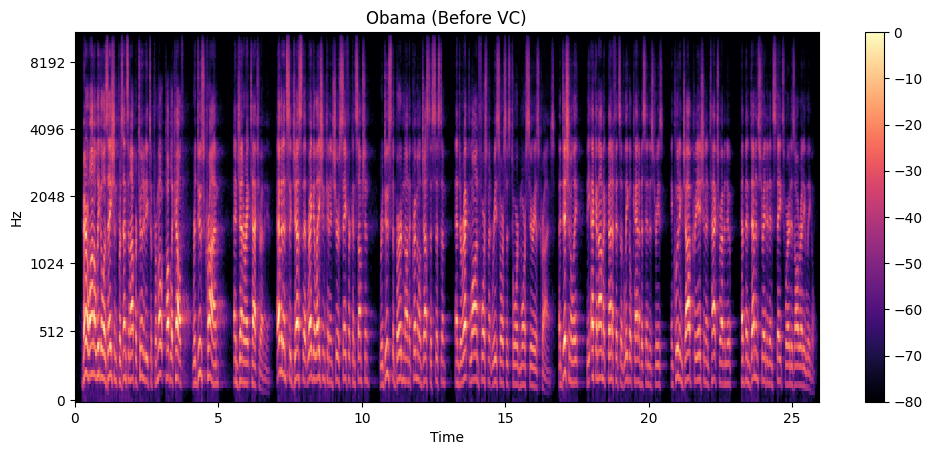

In [3]:
# Obama: generate before mel
show_mel_spectrogram(filepath="good_outputs/Obama/obama_output_fishspeech.wav", title="Obama (Before VC)")

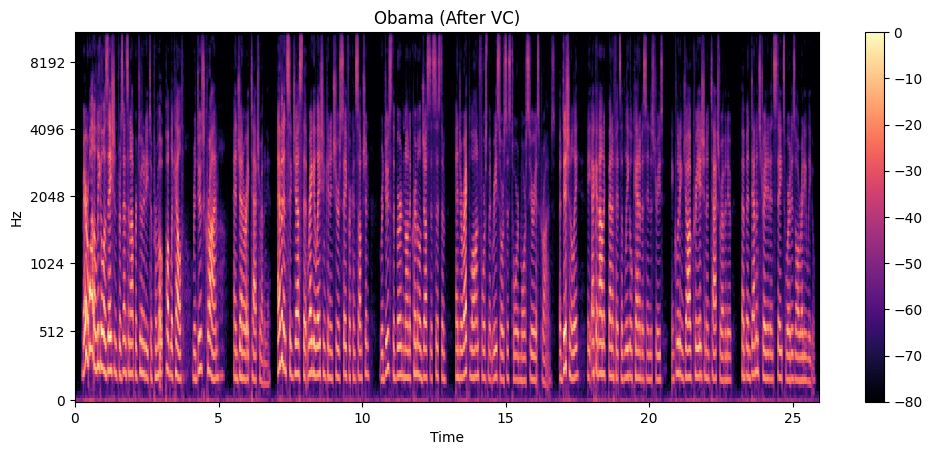

In [4]:
# Obama: generate after mel
show_mel_spectrogram(filepath="good_outputs/Obama/obama_to_taco2.wav", title="Obama (After VC)")

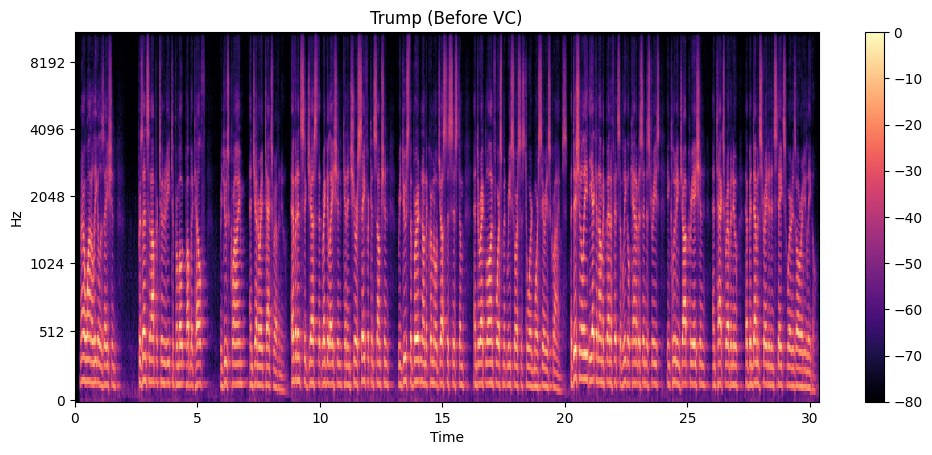

In [5]:
# Trump: generate before mel 
show_mel_spectrogram("good_outputs/Trump/trump_output_fishspeech.wav", title="Trump (Before VC)")

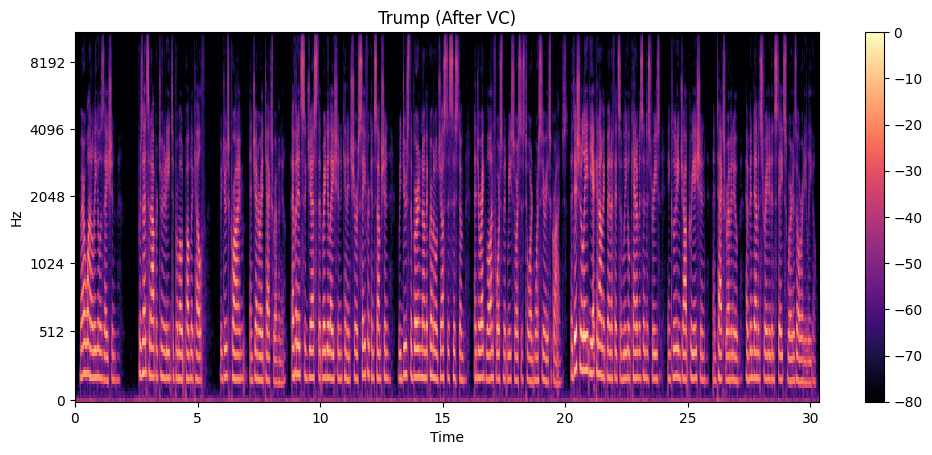

In [6]:
# Trump: generate after mel
show_mel_spectrogram("good_outputs/Trump/trump_to_taco2.wav", title="Trump (After VC)")

### Frequency Calculations

In [36]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
def estimate_frequencies(filepath, title):
    y, sr = librosa.load(filepath)
    f0s = librosa.yin(y, sr=sr, fmin=65, fmax=2093)
    fig, ax = plt.subplots()
    ax.plot(f0s)
    ax.set_title(title)
    ax.set_ylabel("Fundamental Frequency (F0)")
    ax.set_xlabel("Frame")
    return f0s

In [47]:
def print_statistics(f0s):
    mean = np.mean(f0s)
    std = np.std(f0s)
    cv = std/mean
    print("Mean:", mean)   
    print("Standard Deviation:", std)
    print("Coefficient of Variation (CV):", cv)
    

Mean: 315.48299175908807
Standard Deviation: 407.7421528857058
Coefficient of Variation (CV): 1.2924378287786416


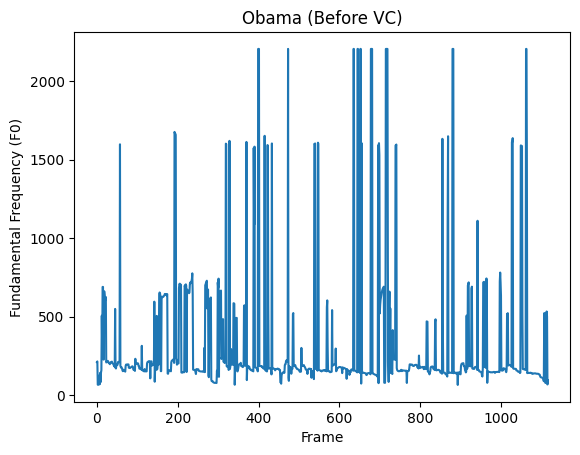

In [48]:
# Obama (Before VC)
obama_bf_f0s = estimate_frequencies("good_outputs/Obama/obama_output_fishspeech.wav", "Obama (Before VC)")
print_statistics(obama_bf_f0s)

Mean: 343.10868812090877
Standard Deviation: 458.1279603559317
Coefficient of Variation (CV): 1.335226930174648


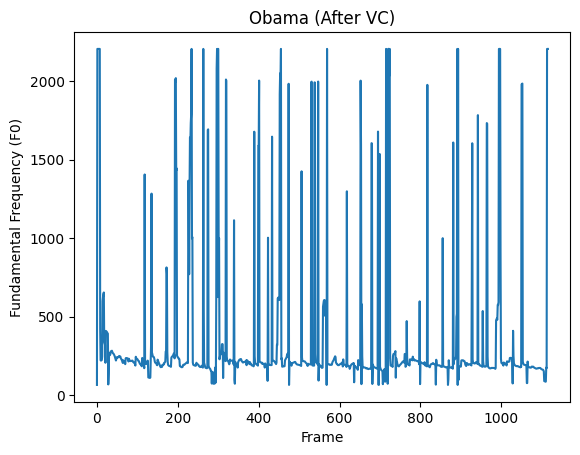

In [49]:
# Obama (After VC)
obama_af_f0s = estimate_frequencies("good_outputs/Obama/obama_to_taco2.wav", "Obama (After VC)")
print_statistics(obama_af_f0s)

Mean: 176.47364826182667
Standard Deviation: 236.36556548736053
Coefficient of Variation (CV): 1.3393816460159236


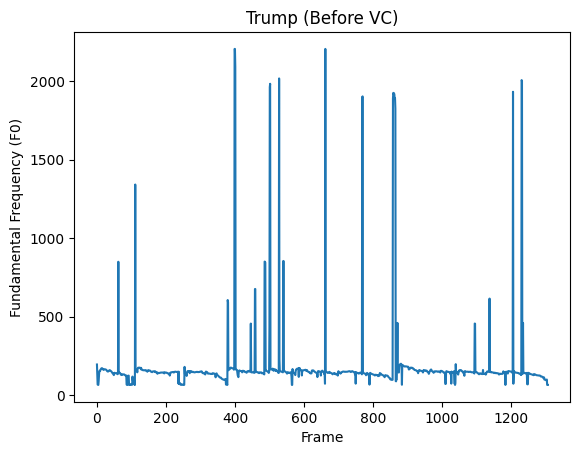

In [50]:
# Trump (Before VC)
trump_bf_f0s = estimate_frequencies("good_outputs/Trump/trump_output_fishspeech.wav", "Trump (Before VC)")
print_statistics(trump_bf_f0s)

Mean: 384.79702099592276
Standard Deviation: 558.4755213261225
Coefficient of Variation (CV): 1.4513509483017542


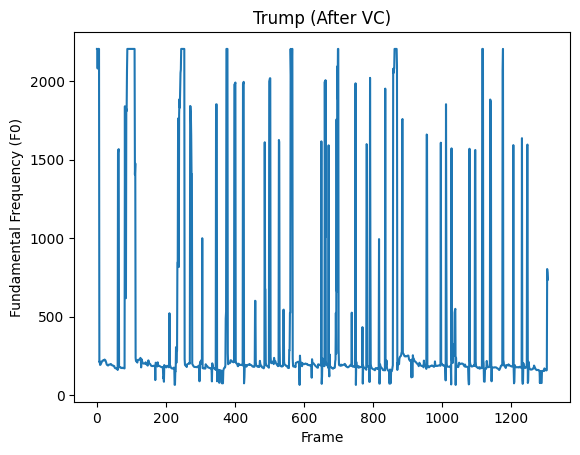

In [51]:
# Trump (After VC)
trump_af_f0s = estimate_frequencies("good_outputs/Trump/trump_to_taco2.wav", "Trump (After VC)")
print_statistics(trump_af_f0s)

Mean: 411.51828924416634
Standard Deviation: 562.9478619654021
Coefficient of Variation (CV): 1.3679777465039664


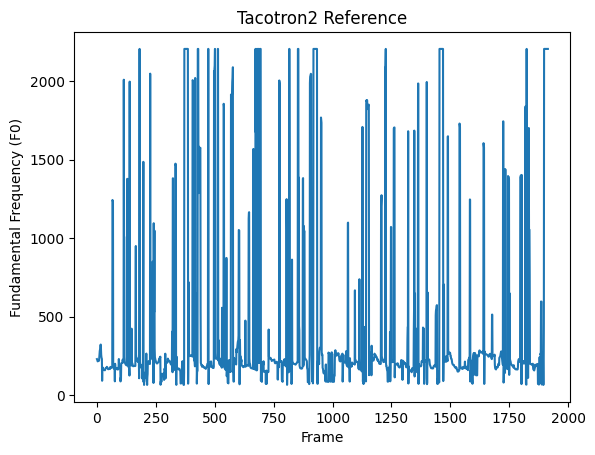

In [53]:
# Baseline VC
taco2_f0s = estimate_frequencies("good_outputs/taco2_speaker_base.wav", "Tacotron2 Reference")
print_statistics(taco2_f0s)

## TedLium

In [50]:
from datasets import load_dataset

tedlium = load_dataset("LIUM/tedlium", "release1", split="train", streaming=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/datasets/load.py:1461: FutureWarning: The repository for LIUM/tedlium contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/LIUM/tedlium
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [69]:
print(next(iter(tedlium)))

{'audio': {'path': None, 'array': array([-0.02316284, -0.13613892, -0.19509888, ...,  0.00167847,
        0.00671387, -0.00033569]), 'sampling_rate': 16000}, 'text': "i've also had some meals that(2) make me want(2) to dry heave {BREATH} so {BREATH} it's about choosing the parts of the bible about compassion {BREATH} about tolerance about loving your(2) neighbor {BREATH} as opposed to the parts {SMACK} <sil>", 'speaker_id': 'AJJacobs_2007P', 'gender': 1, 'file': 'train/AJJacobs_2007P.sph', 'id': 'AJJacobs_2007P-1000.40-1011.88-<o,f0,female>'}


In [176]:
# create male and female splits
tedlium_male = tedlium.filter(lambda x: x["gender"]==2).shuffle(42)
tedlium_female = tedlium.filter(lambda x: x["gender"]==1).shuffle(42)

In [109]:
from IPython.display import Audio

### Male Speakers

In [154]:
tedlium_male = iter(tedlium_male)

In [175]:
# male 1
male1 = next(tedlium_male)
print(male1)
array_m1 = male1["audio"]["array"]
sr_m1 = male1["audio"]["sampling_rate"]
Audio(array_m1, rate=sr_m1)

{'audio': {'path': None, 'array': array([ 0.16726685,  0.16162109,  0.16827393, ..., -0.00344849,
        0.00418091, -0.00378418]), 'sampling_rate': 16000}, 'text': 'what(2) murray(2) was(2) talking about yesterday in the(2) <sil> fractal beauty {BREATH} of nature of having <sil> the descriptions at various levels be {UH} rather <sil>', 'speaker_id': 'AlanKay_2007', 'gender': 2, 'file': 'train/AlanKay_2007.sph', 'id': 'AlanKay_2007-344.67-355.02-<o,f0,male>'}


In [177]:
# remove the previous speaker
tedlium_male_rm = iter(tedlium_male.filter(lambda x: x["speaker_id"] != "AlanKay_2007"))

In [148]:
# male 2
male2 = next(tedlium_male_rm)
print(male2)
array_m2 = male2["audio"]["array"]
sr_m2 = male2["audio"]["sampling_rate"]
Audio(array_m2, rate=sr_m2)

{'audio': {'path': None, 'array': array([ 0.04214478,  0.04223633,  0.04620361, ..., -0.00390625,
       -0.00564575, -0.00994873]), 'sampling_rate': 16000}, 'text': "i ended up with this <sil> my maltese falcon {BREATH} and <sil> it's {SMACK} beautiful and i can {NOISE} state {NOISE} with authority at this point in time when(3) i'd finished it {BREATH} of {UH} all of the {NOISE} replicas out there and there is a few", 'speaker_id': 'AdamSavage_2008P', 'gender': 2, 'file': 'train/AdamSavage_2008P.sph', 'id': 'AdamSavage_2008P-641.94-652.45-<o,f0,male>'}


### Female Speakers

In [117]:
female1 = next(tedlium_female)
print(female1)
array_f1 = female1["audio"]["array"]
sr_f1 = female1["audio"]["sampling_rate"]
Audio(array_f1, rate=sr_f1)

{'audio': {'path': None, 'array': array([-0.07711792, -0.00057983, -0.02108765, ...,  0.00027466,
        0.00012207, -0.0005188 ]), 'sampling_rate': 16000}, 'text': "and(2) from(2) this information(2) <sil> we can begin to(2) map {SMACK} the hope spots <sil> right <sil> so this is just three years(2) of data(2) <sil> right here and(2) there's a decade of this data(2) {BREATH} we see the pulse and(2) the seasonal <sil>", 'speaker_id': 'BarbaraBlock_2010Z', 'gender': 1, 'file': 'train/BarbaraBlock_2010Z.sph', 'id': 'BarbaraBlock_2010Z-1035.88-1046.06-<o,f0,female>'}


In [123]:
# remove the previous speaker
tedlium_female_rm = iter(tedlium_female.filter(lambda x: (x["speaker_id"] != "BarbaraBlock_2010Z") and x["speaker_id"] != "AaronHuey_2010X" and x["speaker_id"] != "ArthurBenjamin_2005"))

In [145]:
female2 = next(tedlium_female_rm)
print(female2)
array_f2 = female2["audio"]["array"]
sr_f2 = female2["audio"]["sampling_rate"]
Audio(array_f2, rate=sr_f2)

{'audio': {'path': None, 'array': array([-0.00402832, -0.0032959 , -0.00262451, ...,  0.00054932,
        0.00085449,  0.00076294]), 'sampling_rate': 16000}, 'text': '<sil> i {NOISE} mean if it just(2) gives you a(2) <sil> comparison of {COUGH} these are(2) {COUGH} you know(2) truly accomplished {COUGH} athletes <sil> without qualifying that word {COUGH} athlete {COUGH} and so i decided to(2) give this {NOISE} a(2) shot <sil> and {UH}', 'speaker_id': 'AimeeMullins_1998', 'gender': 1, 'file': 'train/AimeeMullins_1998.sph', 'id': 'AimeeMullins_1998-186.79-197.43-<o,f0,female>'}
